In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **Data Collection and Preprocessing**

In [ ]:
data = pd.read_csv('/content/US_Stock_Data.csv')
data.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2/2/2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",NaN
1,1,1/2/2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.0


In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
Date,0
Natural_Gas_Price,0
Natural_Gas_Vol.,4
Crude_oil_Price,0
Crude_oil_Vol.,23
Copper_Price,0
Copper_Vol.,37
Bitcoin_Price,0
Bitcoin_Vol.,0


As we can see from the above results Platinum_Vol. has the highest number of null rows so we will drop it and use the mean of the column for the other ones which have null values in it and Unnames: 0 is irrelevant.

In [ ]:
data = data.drop(['Platinum_Vol.', 'Unnamed: 0'], axis = 1)
data.columns

Index(['Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Ethereum_Price', 'Ethereum_Vol.',
       'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.', 'Apple_Price',
       'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.', 'Microsoft_Price',
       'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.', 'Google_Price',
       'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.', 'Berkshire_Price',
       'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.', 'Amazon_Price',
       'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price', 'Gold_Vol.'],
      dtype='object')

In [ ]:
na_columns = ['Crude_oil_Vol.', 'Copper_Vol.', 'Nasdaq_100_Vol.', 'Silver_Vol.', 'Gold_Vol.', 'Natural_Gas_Vol.']

for i in range(len(na_columns)):
  mean_value = data[na_columns[i]].mean()
  data[na_columns[i]].fillna(value=mean_value, inplace=True)

print('Updated dataframe: ')
data.isna().sum()

Updated dataframe: 


<ipython-input-5-ad265c12fc52>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[na_columns[i]].fillna(value=mean_value, inplace=True)


,0
Date,0
Natural_Gas_Price,0
Natural_Gas_Vol.,0
Crude_oil_Price,0
Crude_oil_Vol.,0
Copper_Price,0
Copper_Vol.,0
Bitcoin_Price,0
Bitcoin_Vol.,0
Platinum_Price,0


Correctly formatting the date in the dataset

In [ ]:
data['Date'] = data['Date'].str.replace('/', '-')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,2024-02-02,2.079,129091.932607,72.28,357173.919192,3.8215,37606.752049,"43,194.70",42650,901.6,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",189442.39367
1,2024-02-01,2.050,161340.000000,73.82,577940.000000,3.8535,37606.752049,"43,081.40",47690,922.3,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",260920.00000
2,2024-01-31,2.100,142860.000000,75.85,344490.000000,3.9060,37606.752049,"42,580.50",56480,932.6,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.00000
3,2024-01-30,2.077,139750.000000,77.82,347240.000000,3.9110,37606.752049,"42,946.20",55130,931.7,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.00000
4,2024-01-29,2.490,3590.000000,76.78,331930.000000,3.8790,37606.752049,"43,299.80",45230,938.3,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1013 non-null   datetime64[ns]
 1   Natural_Gas_Price  1013 non-null   float64       
 2   Natural_Gas_Vol.   1013 non-null   float64       
 3   Crude_oil_Price    1013 non-null   float64       
 4   Crude_oil_Vol.     1013 non-null   float64       
 5   Copper_Price       1013 non-null   float64       
 6   Copper_Vol.        1013 non-null   float64       
 7   Bitcoin_Price      1013 non-null   object        
 8   Bitcoin_Vol.       1013 non-null   int64         
 9   Platinum_Price     1013 non-null   object        
 10  Ethereum_Price     1013 non-null   object        
 11  Ethereum_Vol.      1013 non-null   int64         
 12  S&P_500_Price      1013 non-null   object        
 13  Nasdaq_100_Price   1013 non-null   object        
 14  Nasdaq_1

As we can see some of the attributes are Object so we convert them to float datatype for easier analysis.

In [ ]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',','').astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1013 non-null   datetime64[ns]
 1   Natural_Gas_Price  1013 non-null   float64       
 2   Natural_Gas_Vol.   1013 non-null   float64       
 3   Crude_oil_Price    1013 non-null   float64       
 4   Crude_oil_Vol.     1013 non-null   float64       
 5   Copper_Price       1013 non-null   float64       
 6   Copper_Vol.        1013 non-null   float64       
 7   Bitcoin_Price      1013 non-null   float64       
 8   Bitcoin_Vol.       1013 non-null   int64         
 9   Platinum_Price     1013 non-null   float64       
 10  Ethereum_Price     1013 non-null   float64       
 11  Ethereum_Vol.      1013 non-null   int64         
 12  S&P_500_Price      1013 non-null   float64       
 13  Nasdaq_100_Price   1013 non-null   float64       
 14  Nasdaq_1

## **2. Exploratory Data Analysis**

In [ ]:
# Extract columns with '_Price' in the name
price_columns = [col for col in data.columns if '_Price' in col]

# Calculate summary statistics (mean, median, variance) for each price column
summary_stats = data[price_columns].describe().T
summary_stats['variance'] = data[price_columns].var()

# Display summary statistics
print("Summary Statistics for Stock and Commodity Prices:")
print(summary_stats)


Summary Statistics for Stock and Commodity Prices:
                    count           mean           std          min  \
Natural_Gas_Price  1013.0       3.726667      1.943030       1.4820   
Crude_oil_Price    1013.0      69.853475     21.986697     -37.6300   
Copper_Price       1013.0       3.726843      0.646524       2.1005   
Bitcoin_Price      1013.0   29215.594965  15115.630151    4826.0000   
Platinum_Price     1013.0     978.398371    108.577041     595.2000   
Ethereum_Price     1013.0    1731.787502   1100.176730     107.9000   
S&P_500_Price      1013.0    3986.569378    534.132257    2237.4000   
Nasdaq_100_Price   1013.0   13015.564245   2238.770122    6994.2900   
Apple_Price        1013.0     141.964462     33.778785      56.0900   
Tesla_Price        1013.0     208.928263     84.917541      24.0800   
Microsoft_Price    1013.0     265.838855     57.493641     135.4200   
Silver_Price       1013.0      22.795356      3.170649      11.7720   
Google_Price       1013.0 

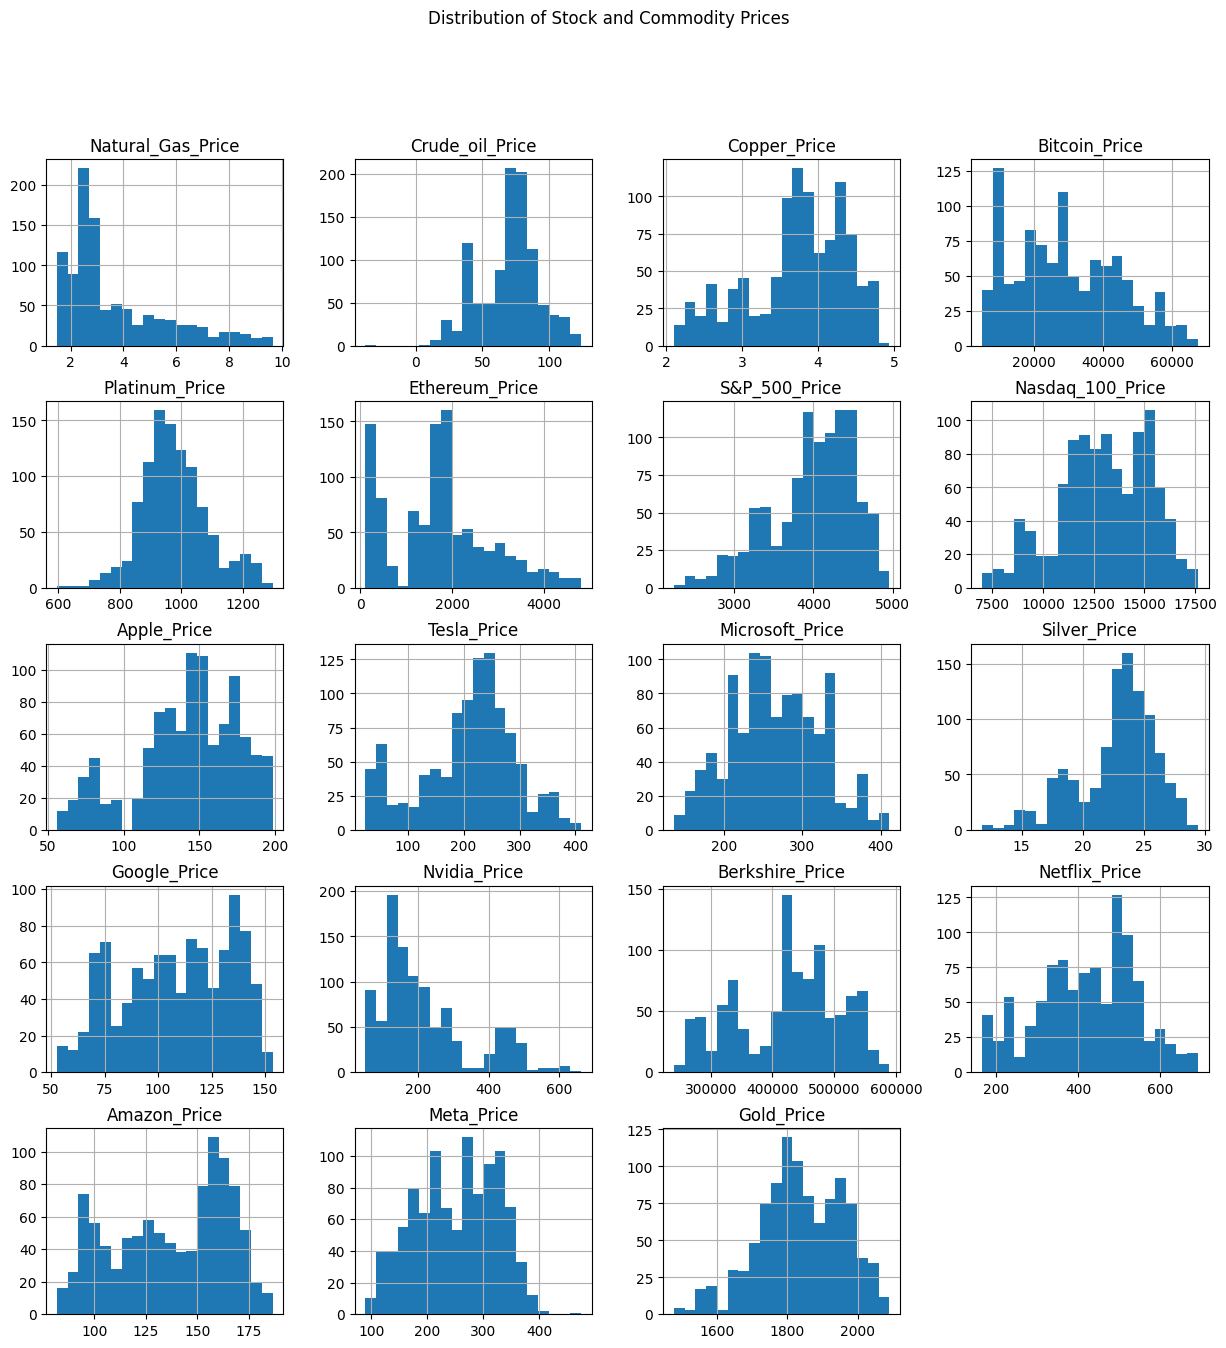

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for each price column
data[price_columns].hist(bins=20, figsize=(15, 15))
plt.suptitle("Distribution of Stock and Commodity Prices")
plt.show()

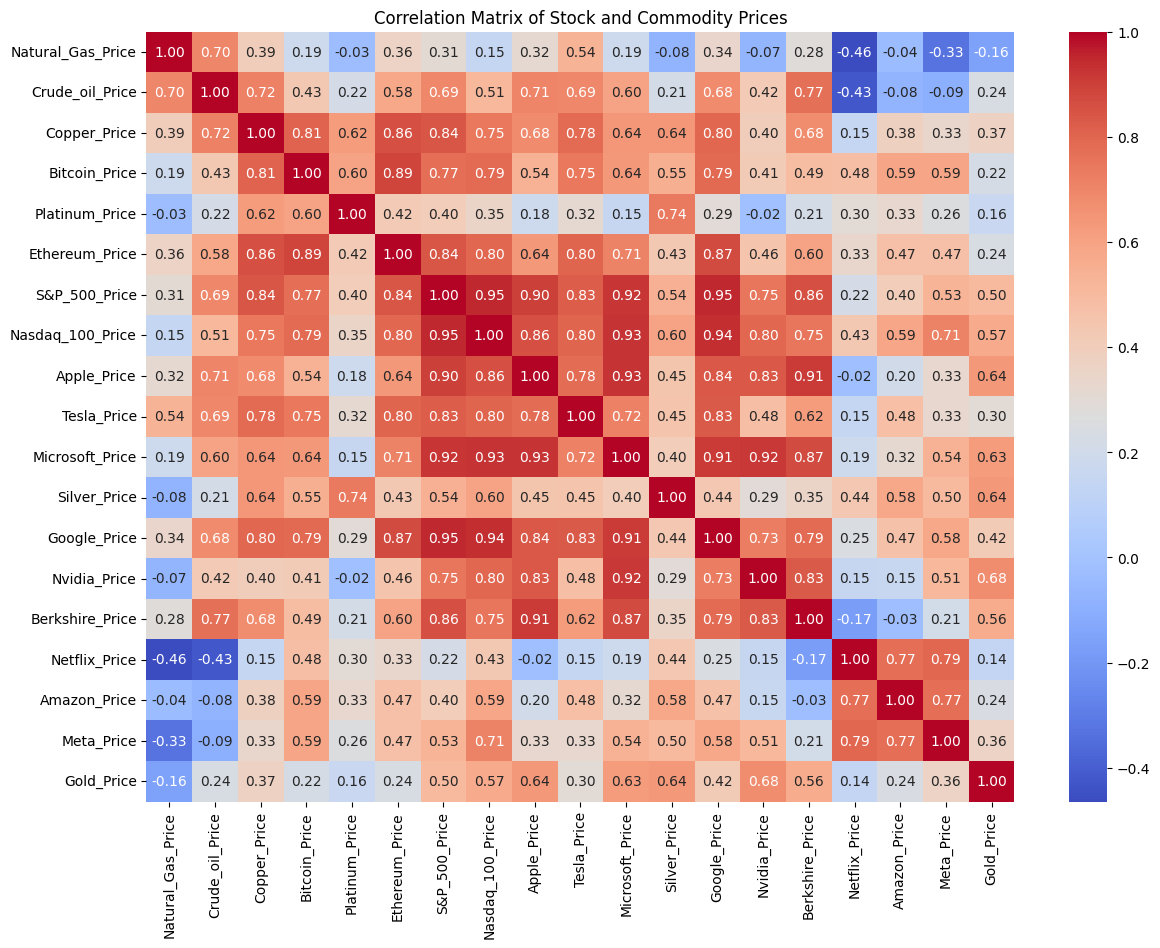

In [ ]:
import seaborn as sns

# Calculate the correlation matrix for price columns
correlation_matrix = data[price_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Stock and Commodity Prices")
plt.show()


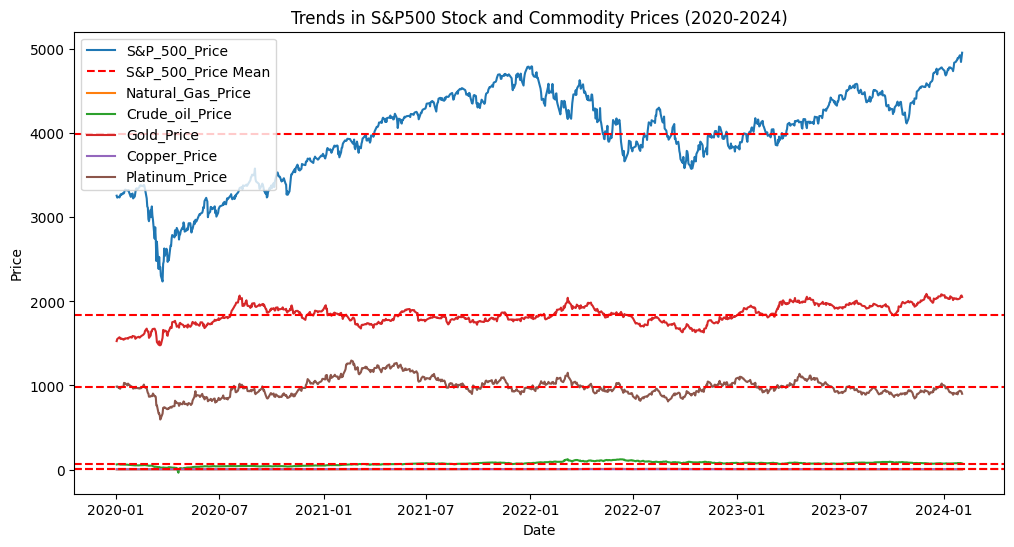

In [ ]:
import matplotlib.pyplot as plt

# List of selected assets (price columns)
selected_assets = ['S&P_500_Price', 'Natural_Gas_Price', 'Crude_oil_Price', 'Gold_Price', 'Copper_Price', 'Platinum_Price']

plt.figure(figsize=(12, 6))

# Loop over each column and plot its data
for col in selected_assets:
    plt.plot(data['Date'], data[col], label=col)

    # Calculate the mean of the selected asset
    mean_value = data[col].mean()

    # Plot a horizontal line at the mean value
    plt.axhline(y=mean_value, color='r', linestyle='--', label=f"{col} Mean" if col == selected_assets[0] else "")

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Trends in S&P500 Stock and Commodity Prices (2020-2024)")
plt.legend()
plt.show()


## **3. Trend Analysis**

## **Linear Regression**

Price Trend Analysis for Apple_Price:
Slope: 0.06833596570813898, R-squared: 0.766168762484388, P-value: 2.737e-321

Volume Trend Analysis for Apple_Vol.:
Slope: -81162.5983433023, R-squared: 0.41519015519408414, P-value: 6.541088083994584e-120


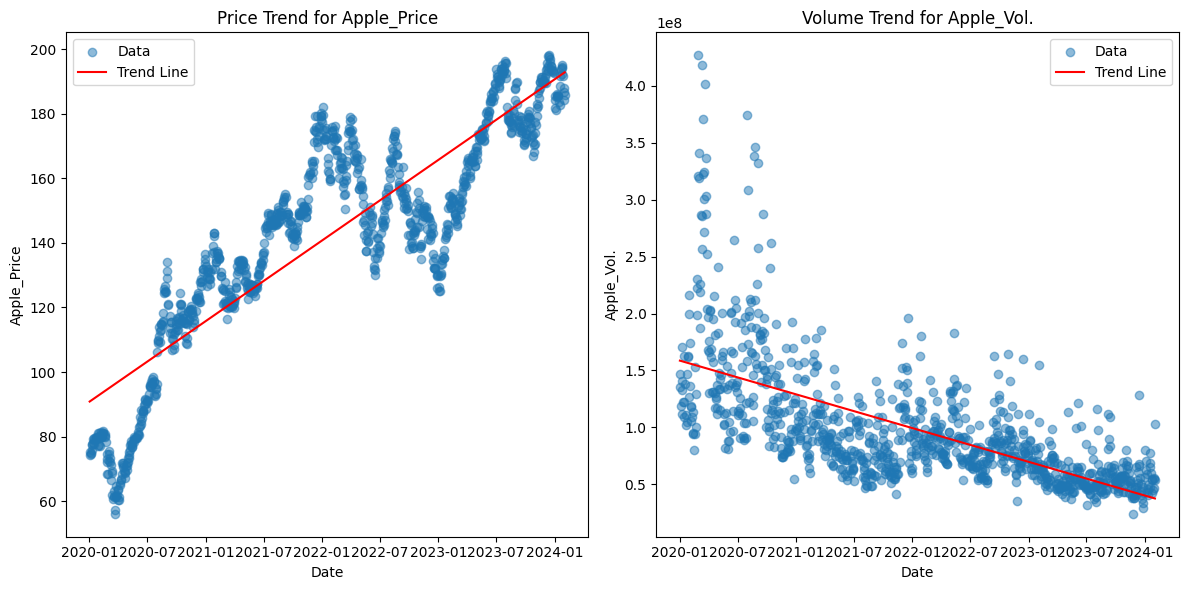

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

data['Date_numeric'] = data['Date'].map(lambda x: x.toordinal())

selected_price_col = 'Apple_Price'
selected_vol_col = 'Apple_Vol.'

slope_price, intercept_price, r_value_price, p_value_price, std_err_price = linregress(data['Date_numeric'], data[selected_price_col])

print(f"Price Trend Analysis for {selected_price_col}:")
print(f"Slope: {slope_price}, R-squared: {r_value_price**2}, P-value: {p_value_price}")

slope_vol, intercept_vol, r_value_vol, p_value_vol, std_err_vol = linregress(data['Date_numeric'], data[selected_vol_col])

print(f"\nVolume Trend Analysis for {selected_vol_col}:")
print(f"Slope: {slope_vol}, R-squared: {r_value_vol**2}, P-value: {p_value_vol}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['Date'], data[selected_price_col], label='Data', alpha=0.5)
plt.plot(data['Date'], slope_price * data['Date_numeric'] + intercept_price, color='red', label='Trend Line')
plt.title(f"Price Trend for {selected_price_col}")
plt.xlabel("Date")
plt.ylabel(selected_price_col)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data['Date'], data[selected_vol_col], label='Data', alpha=0.5)
plt.plot(data['Date'], slope_vol * data['Date_numeric'] + intercept_vol, color='red', label='Trend Line')
plt.title(f"Volume Trend for {selected_vol_col}")
plt.xlabel("Date")
plt.ylabel(selected_vol_col)
plt.legend()


plt.tight_layout()
plt.show()


## **5. Event Impact Analysis**

In this case, we considered the impact of COVID-19 on the stocks of apple inc and S&P500.

This shows that in Apple's stock price is positively correlated to time and vol. is negatively correlated to time.

              Apple_Mean  Apple_Volatility  Apple_Percentage_Change  \
Pre-COVID      77.902750          3.299683                 9.877085   
First Wave     70.067903          6.546386                 3.862994   
Second Wave   125.765763          8.049987               -13.710514   
Omicron Wave  171.322712          5.952488               -13.922481   

              S&P500_Mean  S&P500_Volatility  S&P500_Percentage_Change  
Pre-COVID     3277.780750          95.037565                 10.277840  
First Wave    2770.236613         207.575514                 11.786228  
Second Wave   3676.620847         115.977982                  0.909171  
Omicron Wave  4571.575424         149.490284                  4.092908  


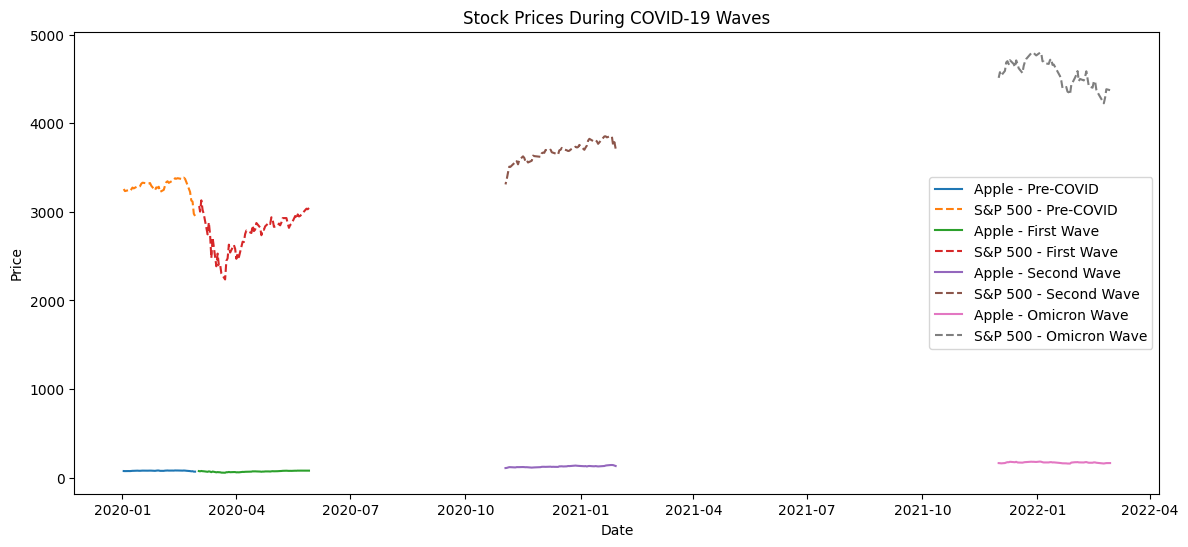

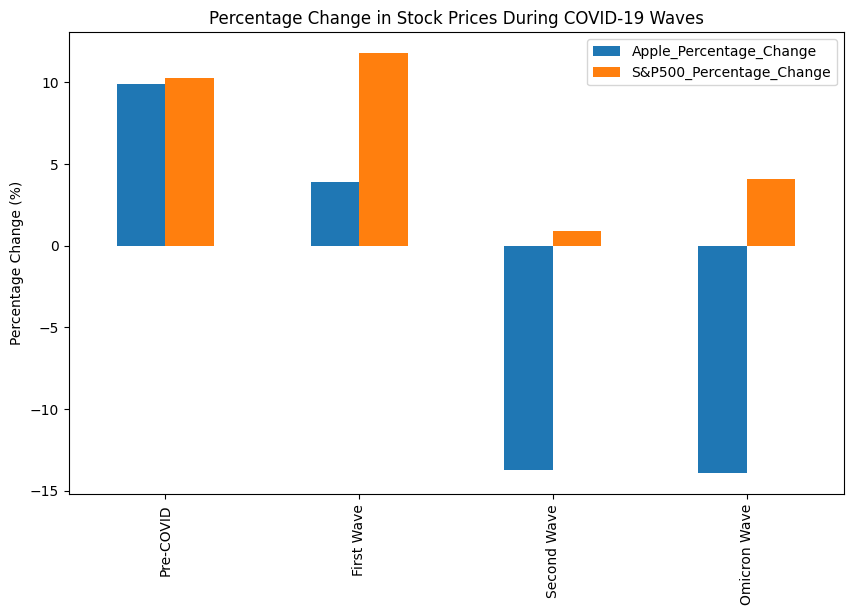

In [ ]:
# Define periods of interest
covid_periods = {
    'Pre-COVID': ['2019-01-01', '2020-02-29'],
    'First Wave': ['2020-03-01', '2020-05-31'],
    'Second Wave': ['2020-11-01', '2021-01-31'],
    'Omicron Wave': ['2021-12-01', '2022-02-28']
}

# Convert to datetime and filter data for each period
data['Date'] = pd.to_datetime(data['Date'])
period_data = {}
for period, (start, end) in covid_periods.items():
    period_data[period] = data[(data['Date'] >= start) & (data['Date'] <= end)]
# for period, df in period_data.items():
#   print(df['Date'], df['Apple_Price'])
# Compute metrics for each period
metrics = {}
apple_change=0
sp500_change = 0
for period, df in period_data.items():
    apple_change += ((df['Apple_Price'].iloc[-1] - df['Apple_Price'].iloc[0]) / df['Apple_Price'].iloc[0]) * 100
    sp500_change += ((df['S&P_500_Price'].iloc[-1] - df['S&P_500_Price'].iloc[0]) / df['S&P_500_Price'].iloc[0]) * 100

    metrics[period] = {
        'Apple_Mean': df['Apple_Price'].mean(),
        'Apple_Volatility': df['Apple_Price'].std(),
        'Apple_Percentage_Change': apple_change,
        'S&P500_Mean': df['S&P_500_Price'].mean(),
        'S&P500_Volatility': df['S&P_500_Price'].std(),
        'S&P500_Percentage_Change': sp500_change
    }

# Convert metrics to DataFrame for analysis
metrics_df = pd.DataFrame(metrics).T

print(metrics_df)
# Plot trends for stock prices
plt.figure(figsize=(14, 6))
for period, df in period_data.items():
    plt.plot(df['Date'], df['Apple_Price'], label=f"Apple - {period}")
    plt.plot(df['Date'], df['S&P_500_Price'], label=f"S&P 500 - {period}", linestyle='--')

plt.title("Stock Prices During COVID-19 Waves")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Bar chart for percentage changes
metrics_df[['Apple_Percentage_Change', 'S&P500_Percentage_Change']].plot(kind='bar', figsize=(10, 6))
plt.title("Percentage Change in Stock Prices During COVID-19 Waves")
plt.ylabel("Percentage Change (%)")
plt.show()


This is about COVID-19 tenure as a whole, now let's break it down to pre-covid-19 and waves as see if we can find anything.

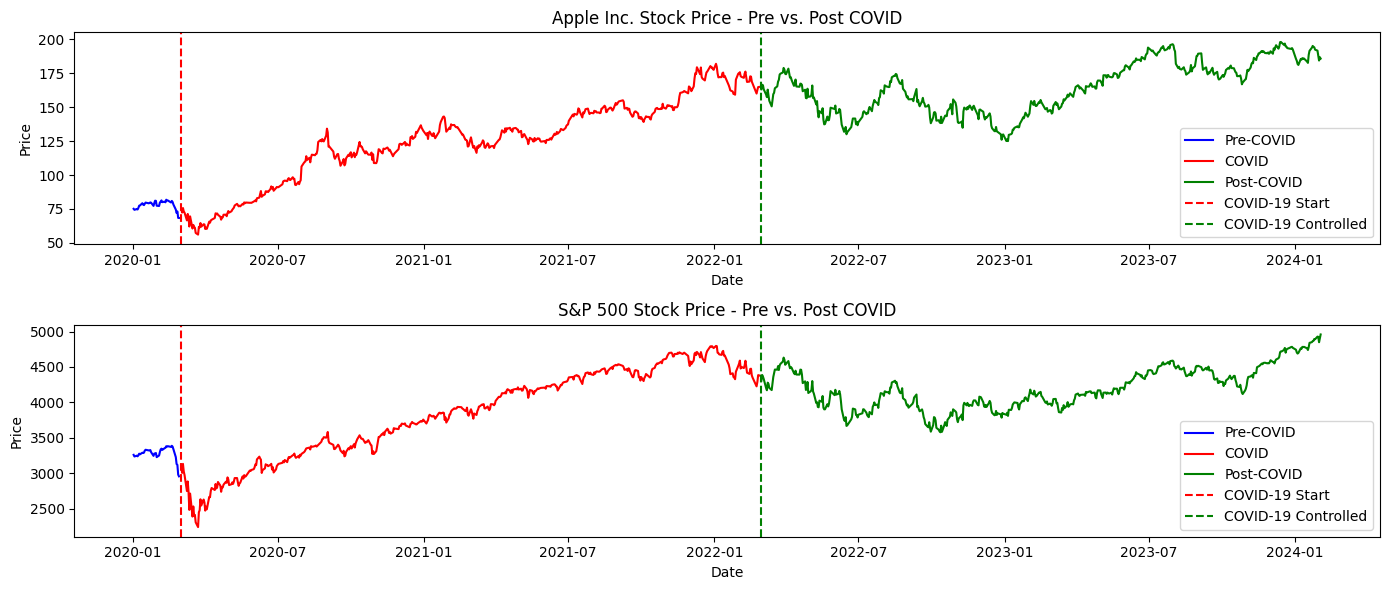

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define COVID-19 start date
covid_start = pd.to_datetime("2020-03-01")
omicron_finish = pd.to_datetime("2022-02-28")

# Filter pre- and post-COVID data
pre_covid = data[data['Date'] < covid_start]
covid = data[(data['Date'] >= covid_start) & (data['Date'] <= omicron_finish)]
post_covid = data[data['Date'] > omicron_finish]

# Descriptive statistics
apple_stats_pre = pre_covid['Apple_Price'].describe()
apple_stats_post = post_covid['Apple_Price'].describe()
sp500_stats_pre = pre_covid['S&P_500_Price'].describe()
sp500_stats_post = post_covid['S&P_500_Price'].describe()

# print("Apple Inc. Pre-COVID Stats:")
# print(apple_stats_pre)
# print("\nApple Inc. Post-COVID Stats:")
# print(apple_stats_post)

# print("\nS&P 500 Pre-COVID Stats:")
# print(sp500_stats_pre)
# print("\nS&P 500 Post-COVID Stats:")
# print(sp500_stats_post)

# Statistical Testing
t_stat_apple, p_value_apple = ttest_ind(pre_covid['Apple_Price'], post_covid['Apple_Price'], equal_var=False)
t_stat_sp500, p_value_sp500 = ttest_ind(pre_covid['S&P_500_Price'], post_covid['S&P_500_Price'], equal_var=False)

# print("\nT-Test Results:")
# print(f"Apple Inc. - T-Statistic: {t_stat_apple:.2f}, P-Value: {p_value_apple:.4f}")
# print(f"S&P 500 - T-Statistic: {t_stat_sp500:.2f}, P-Value: {p_value_sp500:.4f}")

# Visualization
plt.figure(figsize=(14, 6))

# Apple Stock Pre vs. Post COVID
plt.subplot(2, 1, 1)
plt.plot(pre_covid['Date'], pre_covid['Apple_Price'], label='Pre-COVID', color='blue')
plt.plot(covid['Date'], covid['Apple_Price'], label='COVID', color='red')
plt.plot(post_covid['Date'], post_covid['Apple_Price'], label='Post-COVID', color='green')

plt.axvline(covid_start, color='red', linestyle='--', label='COVID-19 Start')
plt.axvline(omicron_finish, color='green', linestyle='--', label='COVID-19 Controlled')
plt.title('Apple Inc. Stock Price - Pre vs. Post COVID')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# S&P 500 Stock Pre vs. Post COVID
plt.subplot(2, 1, 2)
plt.plot(pre_covid['Date'], pre_covid['S&P_500_Price'], label='Pre-COVID', color='blue')
plt.plot(covid['Date'], covid['S&P_500_Price'], label='COVID', color='red')
plt.plot(post_covid['Date'], post_covid['S&P_500_Price'], label='Post-COVID', color='green')

plt.axvline(covid_start, color='red', linestyle='--', label='COVID-19 Start')
plt.axvline(omicron_finish, color='green', linestyle='--', label='COVID-19 Controlled')
plt.title('S&P 500 Stock Price - Pre vs. Post COVID')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


## **6. Time Series Forecasting**

### ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
 #Select a single time series column for ARIMA (e.g., 'S&P_500_Price')
target_column = 'Apple_Price'
time_series = data[['Date', target_column]].dropna()
time_series.set_index('Date', inplace=True)

In [ ]:
# **1. Stationarity Check using ADF Test**
result = adfuller(time_series[target_column])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("The time series is non-stationary. Differencing will be applied.")

    time_series_diff = time_series.diff().dropna()
else:
    print("The time series is stationary.")
    time_series_diff = time_series

ADF Statistic: -0.808152765534983
p-value: 0.816715515992561
The time series is non-stationary. Differencing will be applied.


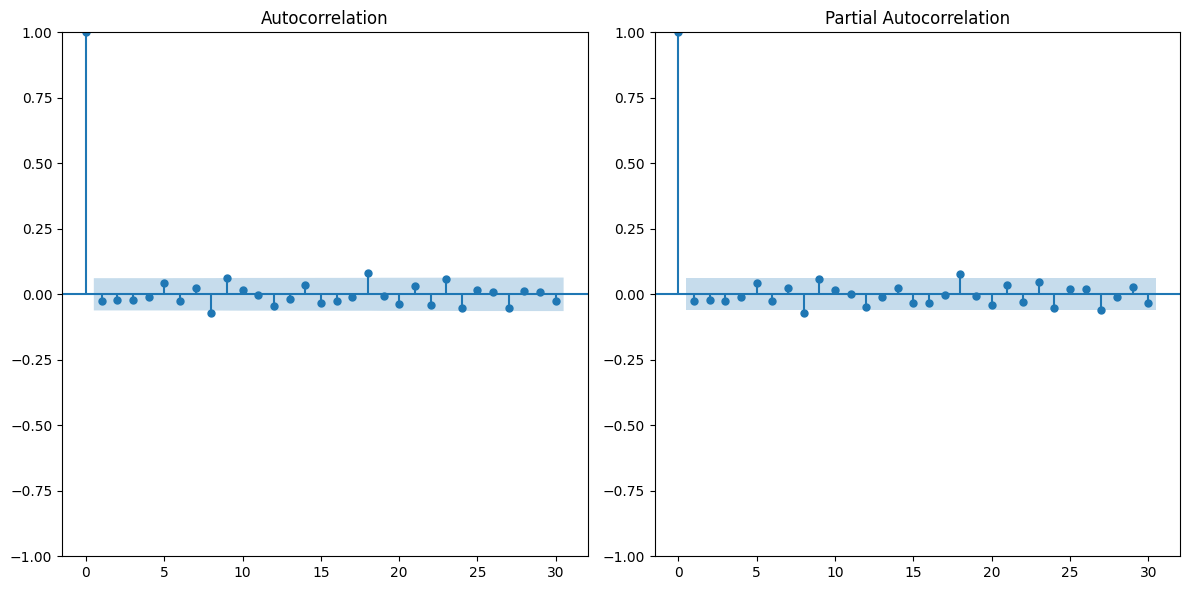

In [ ]:
# **2. Plot AutoCorrelation and Partial AutoCorrelation (ACF and PACF)**
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_acf(time_series_diff[target_column], lags=30, ax=plt.subplot(121))
plot_pacf(time_series_diff[target_column], lags=30, ax=plt.subplot(122))
plt.tight_layout()
plt.show()

In [ ]:
# **3. ARIMA Model Fitting**
# Define the p, d, q parameters based on ACF and PACF
p, d, q = 1, 1, 1  # Example values; adjust based on above plots

# Fit ARIMA model
arima_model = ARIMA(time_series[target_column], order=(p, d, q))
arima_fit = arima_model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
# **5. Forecasting**
# Forecast for the next 30 days
forecast_steps = 30
forecast = arima_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


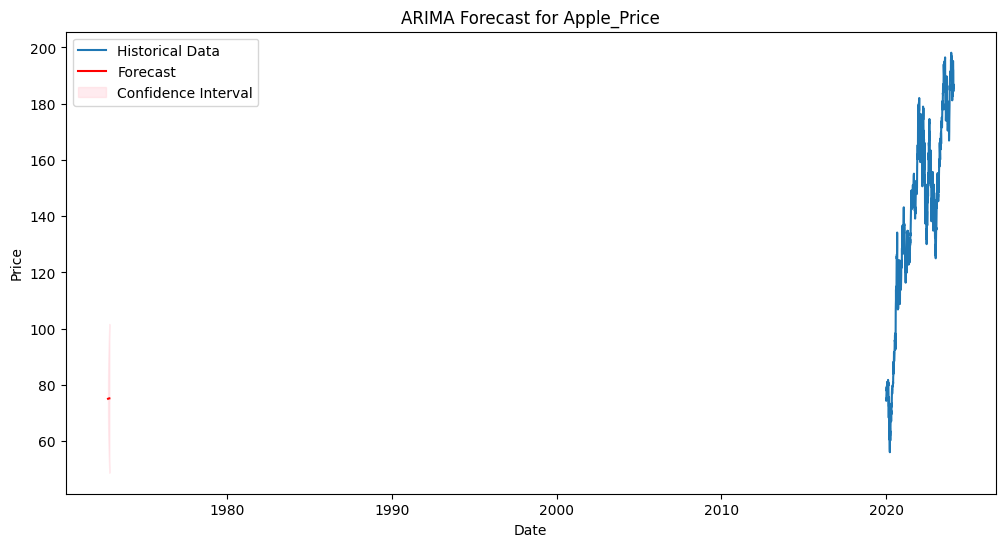

In [ ]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series[target_column], label='Historical Data')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"ARIMA Forecast for {target_column}")
plt.legend()
plt.show()

ADF Statistic: -0.808152765534983
p-value: 0.816715515992561
The time series is non-stationary. Differencing will be applied.


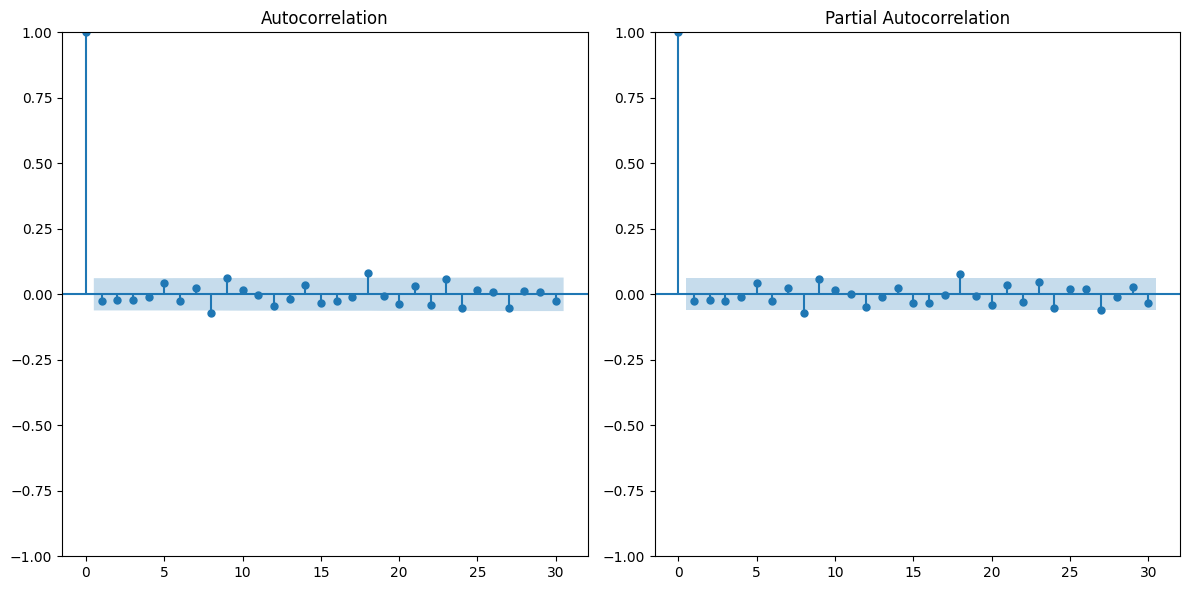

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

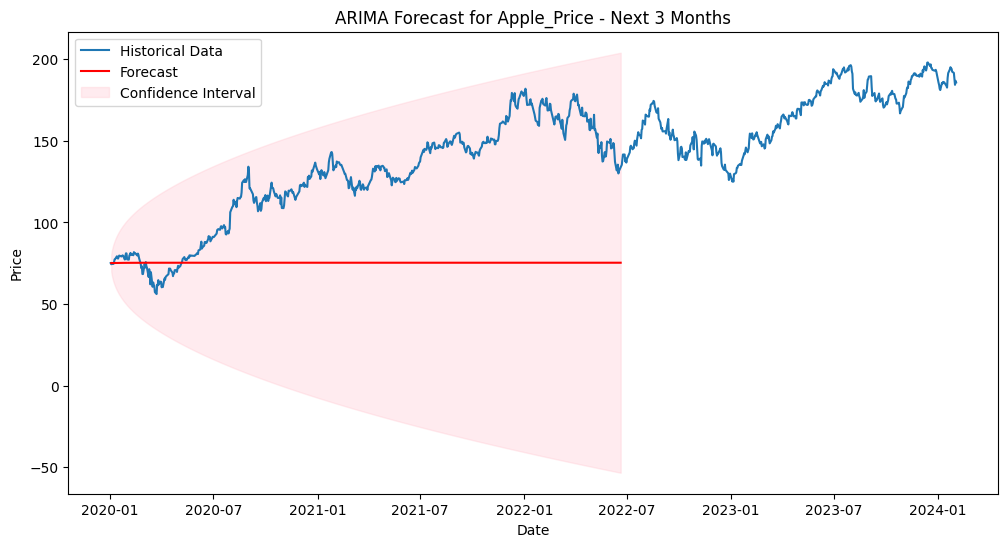

Forecasted Values for Apple_Price for the next 90 days:
1013    75.098592
1014    75.106836
1015    75.114748
1016    75.122340
1017    75.129626
          ...    
1908    75.302727
1909    75.302727
1910    75.302727
1911    75.302727
1912    75.302727
Name: predicted_mean, Length: 900, dtype: float64


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Select the target column for ARIMA (e.g., 'Apple_Price')
target_column = 'Apple_Price'
time_series = data[['Date', target_column]].dropna()

# Ensure 'Date' is in datetime format
time_series['Date'] = pd.to_datetime(time_series['Date'])

# Set the 'Date' as index
time_series.set_index('Date', inplace=True)

# **1. Stationarity Check using ADF Test**
result = adfuller(time_series[target_column])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("The time series is non-stationary. Differencing will be applied.")
    time_series_diff = time_series.diff().dropna()  # Apply differencing if not stationary
else:
    print("The time series is stationary.")
    time_series_diff = time_series

# **2. Plot AutoCorrelation and Partial AutoCorrelation (ACF and PACF)**
plt.figure(figsize=(12, 6))
plot_acf(time_series_diff[target_column], lags=30, ax=plt.subplot(121))
plot_pacf(time_series_diff[target_column], lags=30, ax=plt.subplot(122))
plt.tight_layout()
plt.show()

# Define p, d, q parameters based on ACF and PACF or experimentation
p, d, q = 1, 1, 1  # Example values; adjust based on above plots

# **3. Fit ARIMA Model**
arima_model = ARIMA(time_series[target_column], order=(p, d, q))
arima_fit = arima_model.fit()

# **4. Forecasting the next 90 days (3 months)**
forecast_steps = 900  # 3 months approximately
forecast = arima_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Create a date range for the forecasted period
forecast_dates = pd.date_range(start=time_series.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# **5. Plot the forecasted results**
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(time_series.index, time_series[target_column], label='Historical Data')

# Plot forecast data (predicted values)
plt.plot(forecast_dates, forecast.predicted_mean, label='Forecast', color='red')

# Plot the confidence interval
plt.fill_between(forecast_dates,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')

# Labeling
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"ARIMA Forecast for {target_column} - Next 3 Months")
plt.legend()

# Display the plot
plt.show()

# **6. Print forecasted values (if needed)**
print(f"Forecasted Values for {target_column} for the next 90 days:")
print(forecast.predicted_mean)


In [ ]:
# **6. Model Evaluation**
# Split data into train and test sets
train_size = int(len(time_series) * 0.8)
train, test = time_series.iloc[:train_size], time_series.iloc[train_size:]

# Refit the ARIMA model on training data
arima_model = ARIMA(train[target_column], order=(p, d, q))
arima_fit = arima_model.fit()

# Forecast the test set
forecast_test = arima_fit.forecast(steps=len(test))
mae = mean_absolute_error(test[target_column], forecast_test)
rmse = np.sqrt(mean_squared_error(test[target_column], forecast_test))

print("Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Model Evaluation:
Mean Absolute Error (MAE): 27.374912981356257
Root Mean Squared Error (RMSE): 32.278318443265846


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
import numpy as np

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate SMAPE
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

In [ ]:
# Refit the ARIMA model on training data
arima_model = ARIMA(train[target_column], order=(p, d, q))
arima_fit = arima_model.fit()

# Forecast the test set
forecast_test = arima_fit.forecast(steps=len(test))

# Calculate errors
mae = mean_absolute_error(test[target_column], forecast_test)
rmse = np.sqrt(mean_squared_error(test[target_column], forecast_test))
mape = mean_absolute_percentage_error(test[target_column], forecast_test)
smape = symmetric_mean_absolute_percentage_error(test[target_column], forecast_test)

# Print results
print("Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape:.2f}%")

Model Evaluation:
Mean Absolute Error (MAE): 27.374912981356257
Root Mean Squared Error (RMSE): 32.278318443265846
Mean Absolute Percentage Error (MAPE): 36.21%
Symmetric Mean Absolute Percentage Error (SMAPE): 28.56%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

### LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Prepare data for LSTM
data_lstm = data[['Date', 'Apple_Price']].dropna()
data_lstm.set_index('Date', inplace=True)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_lstm)

# Split data into train and test
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size, :], scaled_data[train_size:, :]

# # Create dataset for LSTM
# def create_dataset(dataset, look_back=1):
#     X, Y = [], []
#     for i in range(len(dataset) - look_back - 1):
#         a = dataset[i:(i + look_back), 0]
#         X.append(a)
#         Y.append(dataset[i + look_back, 0])
#     return np.array(X), np.array(Y)

# look_back = 10  # Adjust as needed
# X_train, Y_train = create_dataset(train_data, look_back)
# X_test, Y_test = create_dataset(test_data, look_back)

# # Reshape input to be [samples, time steps, features]
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32)  # Adjust epochs and batch_size as needed

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions back to original scale
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((len(train_predict), data_lstm.shape[1] - 1))), axis=1))[:,0]
Y_train = scaler.inverse_transform(np.concatenate((Y_train.reshape(-1, 1), np.zeros((len(Y_train), data_lstm.shape[1] - 1))), axis=1))[:,0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((len(test_predict), data_lstm.shape[1] - 1))), axis=1))[:,0]
Y_test = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((len(Y_test), data_lstm.shape[1] - 1))), axis=1))[:,0]

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 492833696.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 494628384.0000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 490612352.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 496811040.0000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 495902304.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 496871520.0000
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 496159840.0000
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 498779040.0000
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 496411424.0000
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 488667296.0000
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 494792384.0000
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 488774944.0000
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 493714688.0000
Epoch 14/100
25/25 ━━━━━━━━━━━━━━

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 490079648.0000
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 492500832.0000
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 483861216.0000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 491231552.0000
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 482429024.0000
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 493541152.0000
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 491144448.0000
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 486859360.0000
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 486495552.0000
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 484007968.0000
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 479861120.0000
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 490710976.0000
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 487463584.0000
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━

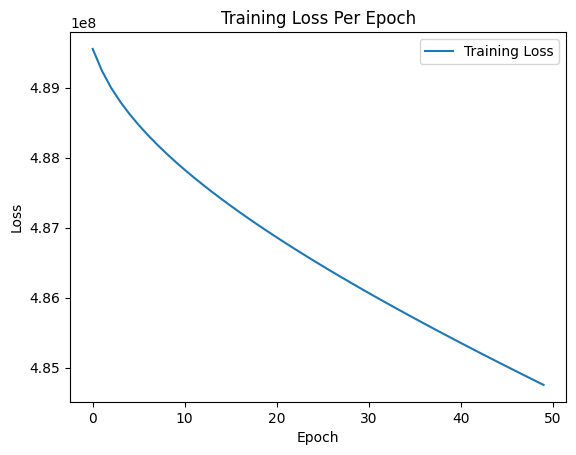

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Train the model and store the training history
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)  # Adjust verbosity as needed

# Retrieve the training loss per epoch
training_loss_per_epoch = history.history['loss']

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Calculate training and test errors (using MSE)
train_error = mean_squared_error(Y_train, train_predict)
test_error = mean_squared_error(Y_test, test_predict)

# Print the errors
print(f"Training Error (MSE): {train_error}")
print(f"Test Error (MSE): {test_error}")

# Optionally, calculate RMSE
train_rmse = np.sqrt(train_error)
test_rmse = np.sqrt(test_error)

print(f"Training Error (RMSE): {train_rmse}")
print(f"Test Error (RMSE): {test_rmse}")

# Plot training loss per epoch
import matplotlib.pyplot as plt

plt.plot(training_loss_per_epoch, label='Training Loss')
plt.title('Training Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:


# Calculate percentage errors
train_mape = mean_absolute_percentage_error(Y_train, train_predict)
test_mape = mean_absolute_percentage_error(Y_test, test_predict)

train_smape = symmetric_mean_absolute_percentage_error(Y_train, train_predict)
test_smape = symmetric_mean_absolute_percentage_error(Y_test, test_predict)

# Print results
print(f"Training Error (MAPE): {train_mape:.2f}%")
print(f"Test Error (MAPE): {test_mape:.2f}%")

print(f"Training Error (SMAPE): {train_smape:.2f}%")
print(f"Test Error (SMAPE): {test_smape:.2f}%")


Training Error (MAPE): 99.36%
Test Error (MAPE): 98.85%
Training Error (SMAPE): 197.47%
Test Error (SMAPE): 195.46%
